In [10]:
import tensorflow as tf
import numpy as np

from pinn import PINNModel, model1
from accuracy import AccuracyCalc
from plotting import NNPlots
from data_gen import DataGenerator

In [11]:
def real_u(area):
    area = np.array(area)
    if len(area.shape) >= 3:
        x = area[0]
        y = area[1]
        return np.sin(np.pi * x) * np.sin(np.pi * y)
    else:
        return np.array([np.sin(np.pi * x) * np.sin(np.pi * y)  for x, y in area])

In [12]:
# force gpu use
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_visible_devices(gpus[0], 'GPU')

In [13]:
area_grid_size = (50, 50)
x_limits = (0, 2)
y_limits = (0, 2)
border_grid_size = (50, 50)

EPOCHS = 100000
EPRINT = 500
LOSS = 1e-4

# Define the learning rate schedule
boundaries = [5000, 25000, 50000]
values = [1e-3, 1e-4, 1e-5, 1e-6]

lr_sched = tf.optimizers.schedules.PiecewiseConstantDecay(boundaries, values)

model = PINNModel(model1(4), optm = tf.keras.optimizers.Adam(learning_rate=lr_sched))

dataGen = DataGenerator(x_limits, y_limits, model.predict, real_u)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353 (17.00 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.train(3, dataGen.inner_pairs(area_grid_size), dataGen.border_pairs(border_grid_size), EPOCHS, LOSS, EPRINT)

epoch: 0 loss: 102.46508
epoch: 500 loss: 0.194141805
epoch: 1000 loss: 0.0837584436
epoch: 1500 loss: 0.0344451666
epoch: 2000 loss: 0.0152523117
epoch: 2500 loss: 0.0236368831
epoch: 3000 loss: 0.00807400141
epoch: 3500 loss: 0.0159126427
epoch: 4000 loss: 0.034044873
epoch: 4500 loss: 0.00166776008
epoch: 5000 loss: 0.00678568287
epoch: 5500 loss: 0.000966025167
epoch: 6000 loss: 0.000938955
epoch: 6500 loss: 0.000902925443
epoch: 7000 loss: 0.000856564788
epoch: 7500 loss: 0.00080169586
epoch: 8000 loss: 0.000770293351
epoch: 8500 loss: 0.000699602359
epoch: 9000 loss: 0.000666660839
epoch: 9500 loss: 0.000598995481
epoch: 10000 loss: 0.000789936516
epoch: 10500 loss: 0.000528390054
epoch: 11000 loss: 0.000467577833
epoch: 11500 loss: 0.000568672898
epoch: 12000 loss: 0.000490256469
epoch: 12500 loss: 0.000435187831
epoch: 13000 loss: 0.000403395679
epoch: 13500 loss: 0.000383745733
epoch: 14000 loss: 0.000477682421
epoch: 14500 loss: 0.000780233531
epoch: 15000 loss: 0.00042105594

In [6]:
# for k in range(1, 10):
#     # model.reset_weights()
#     model.train(k, dataGen.inner_pairs(area_grid_size), dataGen.border_pairs(border_grid_size), EPOCHS, LOSS, EPRINT)
    
#     print("Error:", acc.mse())
#     print("Error:", acc.maxe())

#     model.save(f"../models/model{k}.weights.h5")

#     break

In [7]:
# Should be created after training model, because of predict in __init__
plotter = NNPlots(dataGen, (200, 200))
acc = AccuracyCalc(dataGen, (70, 70))

I0000 00:00:1728671625.840552   16282 service.cc:146] XLA service 0x7f0ca4015ef0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728671625.840584   16282 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2024-10-11 21:33:45.853513: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 258/1250 ━━━━━━━━━━━━━━━━━━━━ 0s 585us/step

I0000 00:00:1728671626.201039   16282 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [8]:
print("Error:", acc.mse())
print("Error:", acc.maxe())

Error: 1.4742628541816222e-05
Error: 0.014572098851203712


/home/arnautov/projectPractice/pinn_puasson/src/plotting.py:77: UserWarning: The following kwargs were not used by contour: 'linestyle'
  real.contour(
/home/arnautov/projectPractice/pinn_puasson/src/plotting.py:98: UserWarning: The following kwargs were not used by contour: 'linestyle'
  pred.contour(
/home/arnautov/projectPractice/pinn_puasson/src/plotting.py:128: UserWarning: The following kwargs were not used by contour: 'linestyle'
  diff.contour(


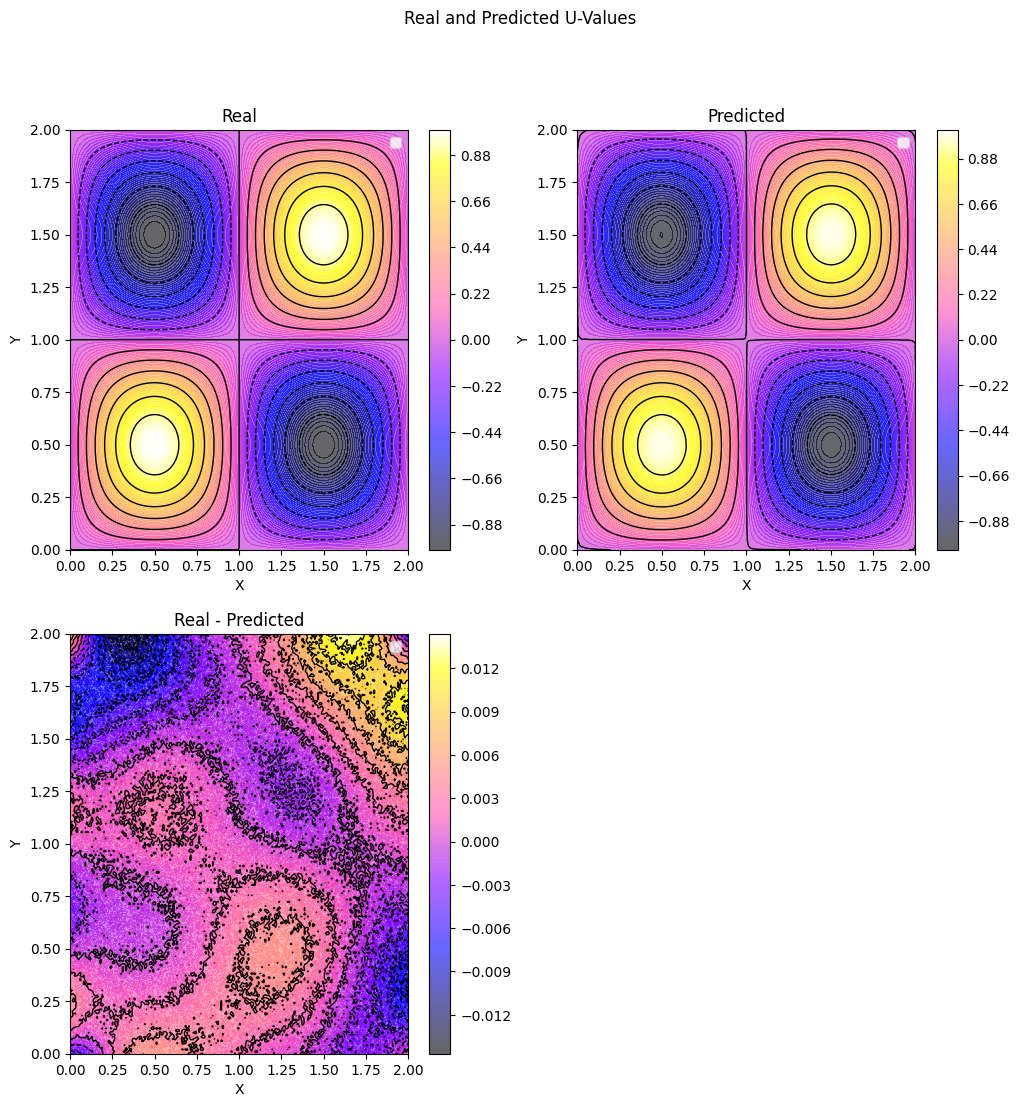

In [9]:
plotter.plot2d_contour(color_map="gnuplot2")